In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models, layers

dftrain_raw = pd.read_csv('./data/titanic/train.csv')
dftest_raw = pd.read_csv('./data/titanic/test.csv')
dftrain_raw.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
5,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
6,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
7,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
8,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
9,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


Text(0.5, 0, 'Survived')

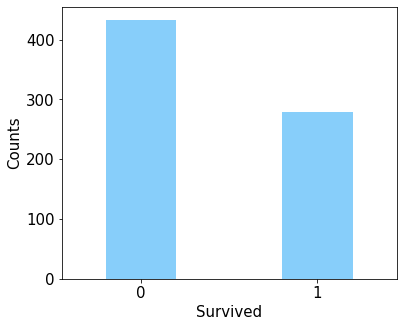

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(
    kind='bar',
    figsize=(6, 5), 
    fontsize=15, 
    rot=0, 
    width=0.4, 
    facecolor='lightskyblue')
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)

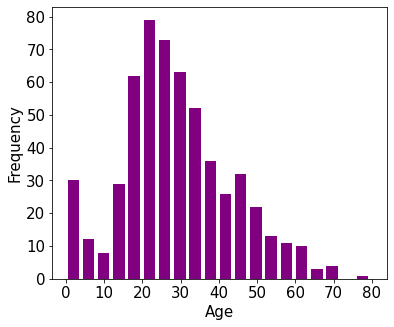

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(
    kind='hist', 
    bins=20, 
    color='purple',
    figsize=(6, 5),
    fontsize=15,
    width=3)
ax.set_ylabel('Frequency', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

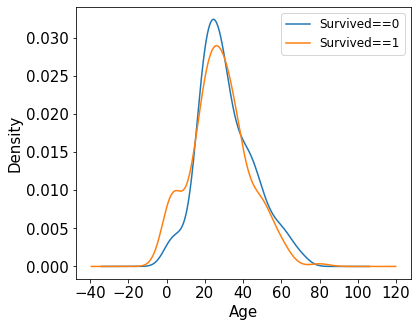

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived==0')['Age'].plot(
    kind='density',
    figsize=(6, 5),
    fontsize=15)
dftrain_raw.query('Survived==1')['Age'].plot(
    kind='density',
    figsize=(6, 5),
    fontsize=15)
ax.legend(['Survived==0', 'Survived==1'], fontsize=12)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
plt.show()

In [5]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    # Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult, dfPclass], axis = 1)

    # Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex], axis = 1)

    # Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    # SibSp, Parch, Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    # Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    # Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'], dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult, dfEmbarked], axis = 1)

    return(dfresult)

In [6]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values

print("x_train.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)

x_train.shape = (712, 15)
x_test.shape = (179, 15)


In [7]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15, ), name="input"))
model.add(layers.Dense(10, activation='relu', name="hidden"))
model.add(layers.Dense(1, activation='sigmoid', name="output"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 20)                320       
_________________________________________________________________
hidden (Dense)               (None, 10)                210       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 二分类问题选择二元交叉熵损失函数
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2    # 分割一部分训练数据用于验证
)

Epoch 1/30
9/9 [==============================] - 0s 39ms/step - loss: 0.7971 - auc: 0.4318 - val_loss: 0.7954 - val_auc: 0.4884
Epoch 2/30
9/9 [==============================] - 0s 5ms/step - loss: 0.7152 - auc: 0.5317 - val_loss: 0.7817 - val_auc: 0.5779
Epoch 3/30
9/9 [==============================] - 0s 7ms/step - loss: 0.6885 - auc: 0.6098 - val_loss: 0.7448 - val_auc: 0.5778
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6495 - auc: 0.6491 - val_loss: 0.7107 - val_auc: 0.5941
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6280 - auc: 0.6734 - val_loss: 0.6779 - val_auc: 0.6270
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6123 - auc: 0.7085 - val_loss: 0.6553 - val_auc: 0.6546
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6077 - auc: 0.7174 - val_loss: 0.6454 - val_auc: 0.6584
Epoch 8/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6045 - auc: 0.7226 - val_loss: 

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+ metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, 'val_' + metric])
#     plt.show()

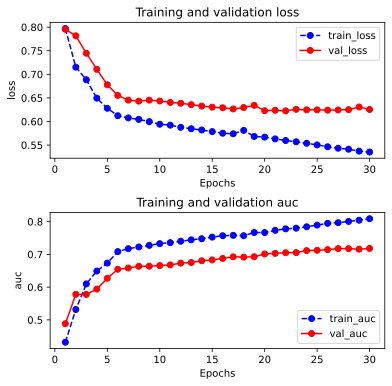

In [10]:
plt.figure(figsize=(6, 6))
plt.subplots_adjust(hspace=0.4)
plt.subplot(2, 1, 1)
plot_metric(history, "loss")
plt.subplot(2, 1, 2)
plot_metric(history, "auc")

In [11]:
model.evaluate(x=x_test, y=y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5336 - auc: 0.8045


[0.5336199998855591, 0.8045293092727661]

In [12]:
# 预测概率
model.predict(x_test[0:10])
# model(tf.constant(x_test[0:10].values, dtype=tf.float32)) # 等价写法

array([[0.18057439],
       [0.40997833],
       [0.40195692],
       [0.69858134],
       [0.4668072 ],
       [0.39097822],
       [0.2679355 ],
       [0.44945693],
       [0.43588743],
       [0.18819675]], dtype=float32)

In [15]:
# 预测类别
(model.predict(x_test[0:10]) > 0.5).astype("int32")
# model.predict_classes(x_test[0:10])   # Sequential.predict_classes is deprecated and will be removed after 2021-01-01

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [16]:
model.save('./data/keras_model.h5')  

del model  # 删除现有模型

# identical to the previous one
model = models.load_model('./data/keras_model.h5')
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 8ms/step - loss: 0.5336 - auc: 0.8045


[0.5336199998855591, 0.8045293092727661]

In [17]:
# 保存模型结构
json_str = model.to_json()

# 恢复模型结构
model_json = models.model_from_json(json_str)

In [18]:
#保存模型权重
model.save_weights('./data/keras_model_weight.h5')

# 恢复模型结构
model_json = models.model_from_json(json_str)
model_json.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['AUC']
    )

# 加载权重
model_json.load_weights('./data/keras_model_weight.h5')
model_json.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.5336 - auc: 0.8045


[0.5336199998855591, 0.8045293092727661]

In [19]:
# 保存权重，该方式仅仅保存权重张量
model.save_weights('./data/tf_model_weights.ckpt', save_format="tf")

In [20]:
# 保存模型结构与模型参数到文件，该方式保存的模型具有跨平台性便于部署
model.save('./data/tf_model_savedmodel', save_format="tf")

model_loaded = tf.keras.models.load_model('./data/tf_model_savedmodel')
model_loaded.evaluate(x_test, y_test)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./data/tf_model_savedmodel/assets
export saved model.
6/6 [==============================] - 0s 3ms/step - loss: 0.5336 - auc: 0.8045


[0.5336199998855591, 0.8045293092727661]